In [5]:
from pyrpiqa import RPIQA

In [2]:
rpiqa = RPIQA("RP-f09013.local", 1, verbose=True)

Transfering executable files...
Transferred acquire
Transferred configure


To test, connect a external sinusoidal signal of frequency of 1 MHz to input 1 of the Red Pitaya.

In [6]:
rpiqa.set_modulation_frequency(1.001e6) # Set the demodulation frequency 1kHz away from the signal
rpiqa.set_sample_rate(rpiqa.SAMPLE_RATE_100KSPS) # Set the sample rate to 100kHz
t, I, Q = rpiqa.acquire(2.5) # Acquire 2.5 seconds of data

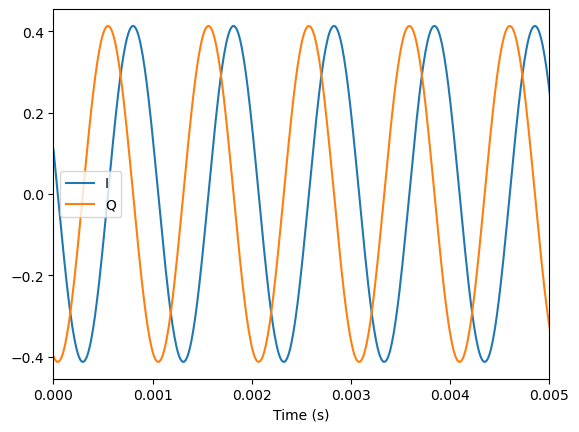

Text(0, 0.5, 'PSD')

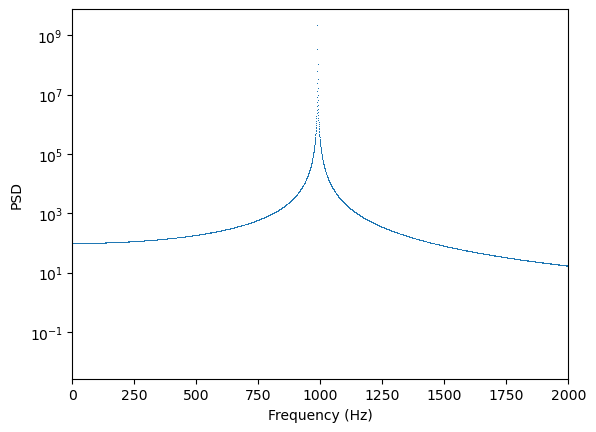

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(t, I, label="I")
plt.plot(t, Q, label="Q")
plt.xlim(0, 5/0.001e6)
plt.xlabel("Time (s)")
plt.legend()
plt.show()

PSD = np.abs(np.fft.rfft(I))**2
freqs = np.fft.rfftfreq(t.shape[0], t[1]-t[0])
plt.plot(freqs, PSD, ",")
plt.xlim(0, 2e3)
plt.yscale("log")
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD")

In [8]:
rpiqa.close()